In [1]:
# importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Set the display options to show all rows
pd.set_option('display.max_rows', None)

In [2]:
# importing dataset

dataset = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
dataset.Date.nunique()

89

In [4]:
df = dataset.copy()

In [5]:
df.columns = df.columns = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating']

In [6]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [7]:
branch_counts = df['Branch'].value_counts().reset_index(drop=True)
city_counts = df['City'].value_counts().reset_index(drop=True)

counts_df = pd.concat([branch_counts, city_counts], axis=1)
counts_df.columns = ['Branch Counts', 'City Counts']

print(counts_df)

   Branch Counts  City Counts
0            340          340
1            332          332
2            328          328


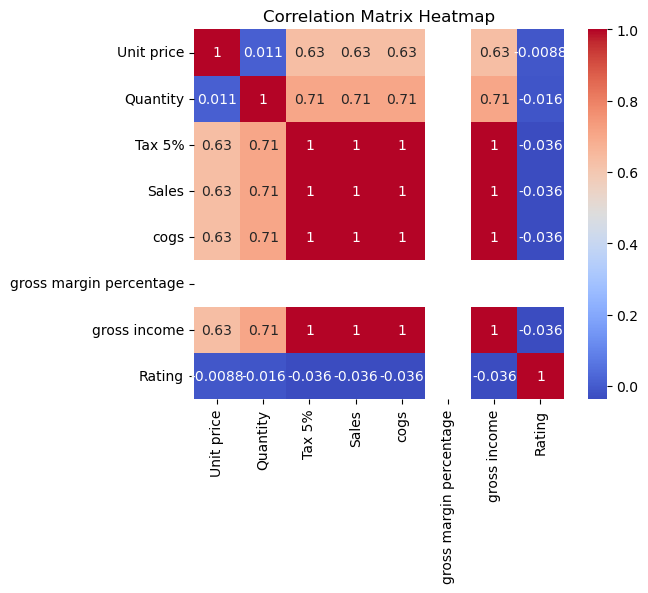

In [8]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

1.'Invoice ID' has been dropped because it consists of unique values, providing no significant insights for our analysis.
2.'City' has been removed since it is redundant with the 'Branch' column, which already captures the location information.
3.'Gross margin percentage' has been excluded as it has a constant value across all observations, offering no variability or informative content.
4.'Time' and 'Rating' columns have been deemed unnecessary for our analysis and thus have been omitted.
5.'Tax 5%', 'COGS' (Cost of Goods Sold), 'Gross Margin Percentage', and 'Gross Income' have been dropped as they are redundant with the 'Sales' column, which already encapsulates the necessary information related to these variables.

In [10]:
df= df.drop(columns=['Invoice ID','City','Tax 5%','Time','cogs','gross margin percentage','gross income','Rating'])

In [11]:
df.columns

Index(['Branch', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Sales', 'Date', 'Payment'],
      dtype='object')

In [12]:
def Categories(i):
    i = i.lower()
    if (i == 'health and beauty') or (i == 'electronic accessories'):
        i = 'Health and Beauty / Electronic Accessories'
    elif (i == 'home and lifestyle') or (i == 'sports and travel'):
        i = 'Home and Lifestyle / Sports and Travel'
    elif (i == 'food and beverages') or (i == 'fashion accessories'):
        i = 'Food and Beverages / Fashion Accessories'
    return i

In [13]:
df['Product line'] = df['Product line'].apply(Categories)

In [14]:
df['Date'] = df['Date'].apply(lambda x:x[0])

## Outliers

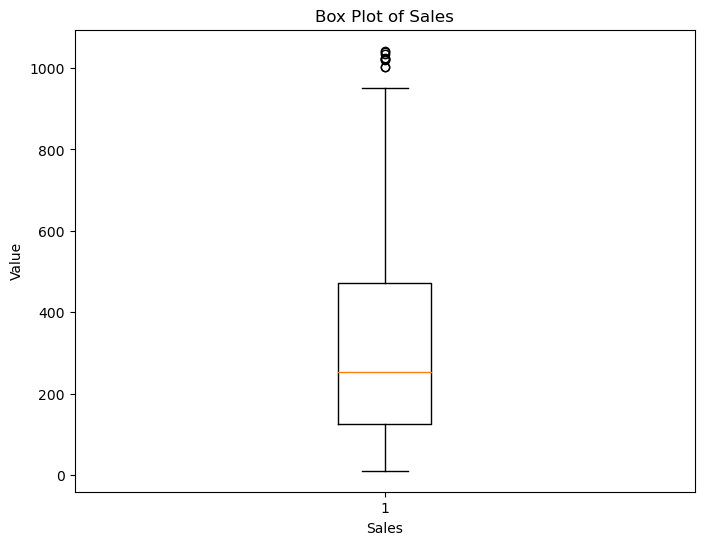

In [15]:
# Checking outliers on 'Sales'

plt.figure(figsize=(8, 6))
plt.boxplot(df['Sales'])
plt.xlabel('Sales')
plt.ylabel('Value')
plt.title('Box Plot of Sales')
plt.show()

In [16]:
# Removing Outliers
df = df[df['Sales'] < 950]

In [17]:
df.corr()

,Unit price,Quantity,Sales
Unit price,1.000000,-0.015807,0.621733
Quantity,-0.015807,1.000000,0.697619
Sales,0.621733,0.697619,1.000000


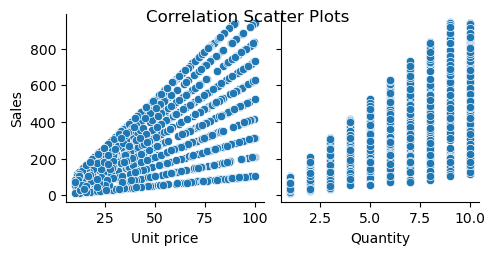

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the relevant columns

# Specify the columns for correlation analysis
columns = ['Unit price', 'Quantity', 'Sales']

# Select the columns of interest
data = df[columns]

# Create a pairplot using seaborn
sns.pairplot(data=data, y_vars=['Sales'], x_vars=['Unit price', 'Quantity'])

# Set plot title
plt.suptitle('Correlation Scatter Plots')

# Show the plot
plt.show()


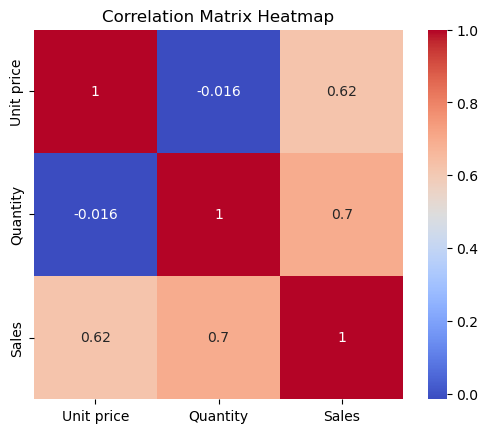

In [19]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
# Separate the features and target
X = df.drop('Sales', axis=1)  # Features (categorical and numerical columns)
y = df['Sales']  # Target column

In [21]:
# Perform standardization on numerical columns

numerical_cols = X.select_dtypes(include=['float', 'int']).columns
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [22]:
# Perform one-hot encoding on categorical columns

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [23]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# Print the shapes of the resulting data splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (791, 12)
X_test shape: (198, 12)
y_train shape: (791,)
y_test shape: (198,)


In [24]:
X.head()

,Unit price,Quantity,Branch_B,Branch_C,Customer type_Normal,Gender_Male,Product line_Health and Beauty / Electronic Accessories,Product line_Home and Lifestyle / Sports and Travel,Date_2,Date_3,Payment_Credit card,Payment_Ewallet
0,0.718847,0.666667,0,0,0,0,1,0,0,0,0,1
1,0.057855,0.444444,0,1,1,0,1,0,0,1,0,0
2,0.403316,0.666667,0,0,1,1,0,1,0,1,1,0
3,0.535603,0.777778,0,0,0,1,1,0,0,0,0,1
4,0.848131,0.666667,0,0,1,1,0,1,1,0,0,1


## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_predict = regressor.predict(X_test)

coef = regressor.coef_
intercept = regressor.intercept_
lrrscore = regressor.score(X_test, y_test)

print('coef',coef)
print('intercept',intercept)
print('rscore',lrrscore)

coef [512.93244045 521.36907283  -4.0560149    0.70550708   4.69119564
  -1.34642     -0.99505585  -2.28731985  -8.07344636   5.13465343
   3.84093229  -2.03065671]
intercept -196.81232666480577
rscore 0.8515996164897406


In [26]:
lr_adjusted_r_squared = 1 - (1 - regressor.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
lr_adjusted_r_squared

0.8419736456674535

In [27]:
# Calculate the errors using RMSE
from sklearn.metrics import mean_squared_error
import math
mlr_rmse = math.sqrt(mean_squared_error(y_test, y_predict))
mlr_rmse

86.63222153858523

## Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(random_state=1234)
dtc.fit(X_train, y_train)

# Test the model
y_predict = dtc.predict(X_test)

dtrrscore = dtc.score(X_test, y_test)
dtrrscore

0.998050314937326

In [29]:
# Calculate the errors using RMSE
from sklearn.metrics import mean_squared_error
import math
dtr_rmse = math.sqrt(mean_squared_error(y_test, y_predict))
dtr_rmse

9.929883924868589

In [30]:
# Calulate Adjusted r Square
dtr_adjusted_r_squared = 1 - (1 - dtc.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
dtr_adjusted_r_squared

0.9979238488792066

## Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor object
rf = RandomForestRegressor(random_state=1234)

# Fit the regressor on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_predict = rf.predict(X_test)

from sklearn.metrics import r2_score

# Calculate the R-squared score
rfrr2 = r2_score(y_test, y_predict)

print("R-squared score:", rfrr2)

R-squared score: 0.9987149085527696


In [32]:
# Calculate the errors using RMSE
from sklearn.metrics import mean_squared_error
import math
rfr_rmse = math.sqrt(mean_squared_error(y_test, y_predict))
rfr_rmse

8.061743131335707

In [33]:
# Calulate Adjusted r Square
rfr_adjusted_r_squared = 1 - (1 - rf.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rfr_adjusted_r_squared

0.9986315512697059

## Gradient Boosting Regressor

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Create a Gradient Boosting regressor object
gb = GradientBoostingRegressor(random_state=1234)

# Fit the regressor on the training data
gb.fit(X_train, y_train)

# Predict on the test data
y_predict = gb.predict(X_test)

# Calculate the R-squared score
gbrr2 = r2_score(y_test, y_predict)

print("R-squared score:", gbrr2)

R-squared score: 0.9978071337362485


In [35]:
# Calculate the errors using RMSE
from sklearn.metrics import mean_squared_error
import math
gbr_rmse = math.sqrt(mean_squared_error(y_test, y_predict))
gbr_rmse

10.530961201904683

In [36]:
# Calulate Adjusted r Square
gbr_adjusted_r_squared = 1-(1-gb.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
gbr_adjusted_r_squared

0.9976648937623835

In [37]:
import numpy as np

In [38]:
print('ML models results when Sales column as Target')
print('-----------------------------------------------------------------------------')
print('Algorithm'.ljust(30), 'Score'.rjust(20), 'Adjusted-r-Squared'.rjust(20), 'RMSE'.rjust(20))
print('Linear Regression'.ljust(30), str(lrrscore).rjust(20), str(lr_adjusted_r_squared).rjust(20), str(mlr_rmse).rjust(20))
print('Decision Tree Regressor'.ljust(30), str(dtrrscore).rjust(20), str(dtr_adjusted_r_squared).rjust(20), str(dtr_rmse).rjust(20))
print('Random Forest Regressor'.ljust(30), str(rfrr2).rjust(20),  str(rfr_adjusted_r_squared).rjust(20), str(rfr_rmse).rjust(20))
print('Gradient Boosting Regressor'.ljust(30), str(gbrr2).rjust(20), str(gbr_adjusted_r_squared).rjust(20), str(gbr_rmse).rjust(20))

ML models results when Sales column as Target
-----------------------------------------------------------------------------
Algorithm                                     Score   Adjusted-r-Squared                 RMSE
Linear Regression                0.8515996164897406   0.8419736456674535    86.63222153858523
Decision Tree Regressor           0.998050314937326   0.9979238488792066    9.929883924868589
Random Forest Regressor          0.9987149085527696   0.9986315512697059    8.061743131335707
Gradient Boosting Regressor      0.9978071337362485   0.9976648937623835   10.530961201904683
